In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("./ds_salary_eda_ready.csv")

In [3]:
for i in df.select_dtypes('object').columns:
    print(f'{i} : {len(df[i].unique())} different classes.')

Job Title : 264 different classes.
job_category : 7 different classes.
seniority : 3 different classes.
Job Description : 463 different classes.
Company Name : 343 different classes.
Company text : 343 different classes.
Location : 200 different classes.
Headquarters : 198 different classes.
Job_state : 37 different classes.
Size : 9 different classes.
Type of ownership : 11 different classes.
Industry : 60 different classes.
Sector : 25 different classes.
Revenue : 14 different classes.
Competitors : 128 different classes.


In [4]:
df.columns

Index(['Job Title', 'job_category', 'seniority', 'Job Description', 'desc_len',
       'Rating', 'Company Name', 'Company text', 'Location', 'Headquarters',
       'Job_state', 'same_state', 'Size', 'Founded', 'company_age',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'competitors_counts', 'Hourly', 'employe provided', 'skill_python',
       'skill_r studio', 'skill_excel', 'skill_machine learning',
       'skill_analysis', 'skill_spark', 'skill_aws', 'Min_salary',
       'Max_salary', 'Avg_salary'],
      dtype='object')

In [5]:
data = df[['job_category', 'seniority','Job_state','Size', 'Sector','Revenue','desc_len','Rating','same_state','company_age','skill_python',
 'skill_excel', 'skill_machine learning',
       'skill_analysis', 'skill_spark', 'skill_aws'  ,'Avg_salary']]

### Spliting the dataset

In [6]:
X = data.drop("Avg_salary",axis=1)
y = data["Avg_salary"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=52)

### Encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
cat_cols = ['job_category', 'seniority', 'Job_state', 'Size', 'Sector','Revenue']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train[cat_cols])


,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",False
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'ignore'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_cate

In [9]:
X_train_encoded = encoder.transform(X_train[cat_cols])
X_test_encoded  = encoder.transform(X_test[cat_cols])


In [10]:
encoded_cols = encoder.get_feature_names_out(cat_cols)

X_train_encoded = pd.DataFrame(
    X_train_encoded,
    columns=encoded_cols,
    index=X_train.index
)

X_test_encoded = pd.DataFrame(
    X_test_encoded,
    columns=encoded_cols,
    index=X_test.index
)


In [11]:
X_train = X_train.drop(columns=cat_cols)
X_test  = X_test.drop(columns=cat_cols)


In [12]:
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test  = pd.concat([X_test, X_test_encoded], axis=1)


In [13]:
X_train

,desc_len,Rating,same_state,company_age,skill_python,skill_excel,skill_machine learning,skill_analysis,skill_spark,skill_aws,...,Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable
53,4734,3.7,0,157,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,2468,3.7,0,239,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,5298,3.7,0,25,1,0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
338,2860,3.7,0,47,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
90,2772,3.5,1,21,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,6817,3.7,0,239,0,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,3934,3.2,0,58,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,4127,4.4,1,12,1,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
525,1793,3.2,0,16,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model Building

### StatsModels LR

In [14]:
import statsmodels.api as sm

In [15]:
X_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_sm)

model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     6.594
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           3.03e-43
Time:                        00:48:28   Log-Likelihood:                -2348.8
No. Observations:                 519   AIC:                             4894.
Df Residuals:                     421   BIC:                             5310.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        55.2697      7.012      7.882      0.000      41.487      69.052
desc_len                                      0.0009      0.001      1.009      0.313      -0.001       0.003
Rating                                        0.3052      2.208      0.138      0.890      -4.034       4.645
same_state                                    2.6494      2.877      0.921      0.358      -3.006       8.305
company_age                                   0.0618      0.033      1.868      0.062      -0.003       0.127
skill_python                                  5.4818      3.082      1.779      0.076      -0.577      11.540
skill_excel                                  -3.8089      3.934     -0.968      0.334     -11.542       3.924
skill_machine learning                        8.1549      3.404      2.395      0.017       1.463      14.847
skill_analysis                               -0.2136      2.863     -0.075      0.941      -5.842       5.415
skill_spark                                  -3.7680      3.655     -1.031      0.303     -10.953       3.417
skill_aws                                     0.3701      3.956      0.094      0.926      -7.406       8.147
job_category_analyst                        -24.3805      4.341     -5.617      0.000     -32.913     -15.848
job_category_data engineer                    7.5409      3.917      1.925      0.055      -0.159      15.240
job_category_data scientist                  14.0007      3.082      4.542      0.000       7.942      20.060
job_category_director                        31.3868      7.362      4.263      0.000      16.915      45.858
job_category_maneger                         -2.5297      6.005     -0.421      0.674     -14.333       9.274
job_category_mle                             29.6105      7.196      4.115      0.000      15.465      43.756
job_category_na                              -0.3590      3.601     -0.100      0.921      -7.437       6.719
seniority_junior                             23.3902     11.993      1.950      0.052      -0.184      46.965
seniority_na                                  4.4660      4.633      0.964      0.336      -4.640      13.572
seniority_senior                             27.4136      4.952      5.536      0.000      17.681      37.146
Job_state_AL                                  3.8792     14.878      0.261      0.794     -25.365      33.124
Job_state_AZ                                  1.0626      9.598      0.111      0.912     -17.804      19.929
Job_state_CA                                 27.7416      3.713      7.471      0.000      20.443      35.040
Job_state_CO                                 -2.6713      9.510     -0.281      0.779     -21.364      16.021
Job

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train,y_train)
np.mean(cross_val_score(lr,X=X_train,y= y_train ,cv=3,scoring='neg_mean_absolute_error'))

np.float64(-21.370112465743006)

### Linear Regression Lasso

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [31]:
ls = Lasso(alpha=0.25)
ls.fit(X_train,y_train)
np.mean(cross_val_score(ls,X=X_train,y=y_train,cv=3,scoring = 'neg_mean_absolute_error'))

np.float64(-20.633458934827306)

In [19]:
alpha = []
error = []

for i in range(100):
    alpha.append(i)
    ls = Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(ls,X=X_train,y=y_train,cv=3,scoring = 'neg_mean_absolute_error')))
    

D:\Data Science\DS salary prediction\ds_salary_proj\env\Lib\site-packages\sklearn\base.py:1336: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
D:\Data Science\DS salary prediction\ds_salary_proj\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\Data Science\DS salary prediction\ds_salary_proj\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.118e+04, tolerance: 4.386e+01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implement

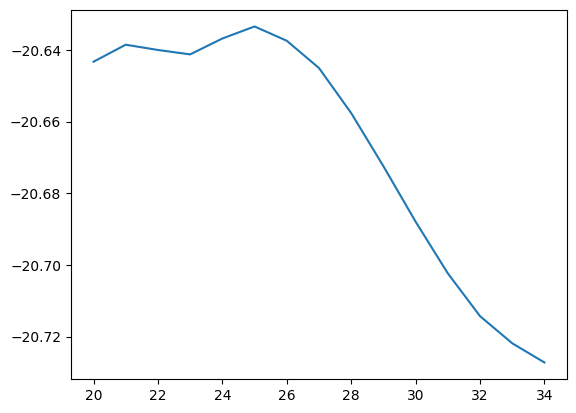

In [20]:
import matplotlib.pyplot as plt
plt.plot(alpha[20:35],error[20:35])

### 3. Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rfr = RandomForestRegressor()
np.mean(cross_val_score(rfr,X=X_train,y=y_train,scoring='neg_mean_absolute_error',cv=3))

np.float64(-15.955366088631985)

## Tunning

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
parameters = {'n_estimators':range(10,300,10),'criterion':('mse','absolute_error'),'max_features':('auto','sqrt','Log2')}

In [25]:
gs = GridSearchCV(rfr,param_grid=parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

D:\Data Science\DS salary prediction\ds_salary_proj\env\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
435 fits failed out of a total of 522.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
261 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Data Science\DS salary prediction\ds_salary_proj\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Data Science\DS salary prediction\ds_salary_proj\env\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File 

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ('mse', ...), 'max_features': ('auto', ...), 'n_estimators': range(10, 300, 10)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_absolute_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is

In [26]:
gs.best_score_

np.float64(-15.456794442754282)

In [27]:
gs.best_estimator_

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",190
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'absolute_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsa

In [32]:
ls_pred= ls.predict(X_test)
rfr_pred = gs.predict(X_test)
lr_pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
print(f'Linear Regression : {mean_absolute_error(y_test,lr_pred)}')
print(f'Lasso : {mean_absolute_error(y_test,ls_pred)}')
print(f'Random Forest : {mean_absolute_error(y_test,rfr_pred)}')

Linear Regression : 21.40603349002877
Lasso : 22.931025439370945
Random Forest : 15.342707104083079


In [35]:
import pickle

In [36]:
pick1 = {'model':gs.best_estimator_}

pickle.dump(pick1, open('model_file'+'.p','wb'))

In [37]:
file_name = 'model_file.p'
with open(file_name,'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']


In [77]:
model.predict(X_test.iloc[:1,:])

array([128.57631579])

In [81]:
X_train.iloc[:5,:].to_dict()

{'desc_len': {53: 4734, 157: 2468, 207: 5298, 338: 2860, 90: 2772},
 'Rating': {53: 3.7, 157: 3.7, 207: 3.7, 338: 3.7, 90: 3.5},
 'same_state': {53: 0, 157: 0, 207: 0, 338: 0, 90: 1},
 'company_age': {53: 157, 157: 239, 207: 25, 338: 47, 90: 21},
 'skill_python': {53: 1, 157: 0, 207: 1, 338: 1, 90: 0},
 'skill_excel': {53: 0, 157: 0, 207: 0, 338: 0, 90: 1},
 'skill_machine learning': {53: 1, 157: 0, 207: 1, 338: 1, 90: 0},
 'skill_analysis': {53: 0, 157: 0, 207: 1, 338: 1, 90: 0},
 'skill_spark': {53: 0, 157: 0, 207: 1, 338: 0, 90: 0},
 'skill_aws': {53: 0, 157: 0, 207: 0, 338: 0, 90: 0},
 'job_category_analyst': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 1.0},
 'job_category_data engineer': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'job_category_data scientist': {53: 1.0,
  157: 0.0,
  207: 1.0,
  338: 0.0,
  90: 0.0},
 'job_category_director': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'job_category_maneger': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},

In [ ]:
{'desc_len': {53: 4734, 157: 2468, 207: 5298, 338: 2860, 90: 2772},
 'Rating': {53: 3.7, 157: 3.7, 207: 3.7, 338: 3.7, 90: 3.5},
 'same_state': {53: 0, 157: 0, 207: 0, 338: 0, 90: 1},
 'company_age': {53: 157, 157: 239, 207: 25, 338: 47, 90: 21},
 'skill_python': {53: 1, 157: 0, 207: 1, 338: 1, 90: 0},
 'skill_excel': {53: 0, 157: 0, 207: 0, 338: 0, 90: 1},
 'skill_machine learning': {53: 1, 157: 0, 207: 1, 338: 1, 90: 0},
 'skill_analysis': {53: 0, 157: 0, 207: 1, 338: 1, 90: 0},
 'skill_spark': {53: 0, 157: 0, 207: 1, 338: 0, 90: 0},
 'skill_aws': {53: 0, 157: 0, 207: 0, 338: 0, 90: 0},
 'job_category_analyst': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 1.0},
 'job_category_data engineer': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'job_category_data scientist': {53: 1.0,
  157: 0.0,
  207: 1.0,
  338: 0.0,
  90: 0.0},
 'job_category_director': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'job_category_maneger': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'job_category_mle': {53: 0.0, 157: 0.0, 207: 0.0, 338: 1.0, 90: 0.0},
 'job_category_na': {53: 0.0, 157: 1.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'seniority_junior': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'seniority_na': {53: 1.0, 157: 1.0, 207: 1.0, 338: 1.0, 90: 1.0},
 'seniority_senior': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_AL': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_AZ': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_CA': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_CO': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_CT': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_DC': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_DE': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_FL': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_GA': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_IA': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_ID': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_IL': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_IN': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_KS': {53: 0.0, 157: 0.0, 207: 0.0, 338: 1.0, 90: 0.0},
 'Job_state_KY': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_LA': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 1.0},
 'Job_state_MA': {53: 0.0, 157: 1.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_MD': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_MI': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_MN': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_MO': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_NC': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_NE': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_NJ': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_NM': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_NY': {53: 1.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_OH': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_OR': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_PA': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_SC': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_TN': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_TX': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_UT': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_VA': {53: 0.0, 157: 0.0, 207: 1.0, 338: 0.0, 90: 0.0},
 'Job_state_WA': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Job_state_WI': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Size_-1': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Size_1 to 50 employees': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Size_10000+ employees': {53: 1.0, 157: 1.0, 207: 1.0, 338: 0.0, 90: 0.0},
 'Size_1001 to 5000 employees': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Size_201 to 500 employees': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Size_5001 to 10000 employees': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Size_501 to 1000 employees': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 1.0,
  90: 0.0},
 'Size_51 to 200 employees': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 1.0},
 'Size_Unknown': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_-1': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Accounting & Legal': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Aerospace & Defense': {53: 0.0,
  157: 0.0,
  207: 1.0,
  338: 0.0,
  90: 0.0},
 'Sector_Agriculture & Forestry': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Sector_Arts, Entertainment & Recreation': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Sector_Biotech & Pharmaceuticals': {53: 0.0,
  157: 1.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Sector_Business Services': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Construction, Repair & Maintenance': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Sector_Consumer Services': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Education': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Finance': {53: 0.0, 157: 0.0, 207: 0.0, 338: 1.0, 90: 0.0},
 'Sector_Government': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Health Care': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Information Technology': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 1.0},
 'Sector_Insurance': {53: 1.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Manufacturing': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Media': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Mining & Metals': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Non-Profit': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Oil, Gas, Energy & Utilities': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Sector_Real Estate': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Retail': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Telecommunications': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Sector_Transportation & Logistics': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Sector_Travel & Tourism': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Revenue_$1 to $2 billion (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Revenue_$1 to $5 million (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Revenue_$10 to $25 million (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Revenue_$10+ billion (USD)': {53: 1.0,
  157: 1.0,
  207: 1.0,
  338: 0.0,
  90: 0.0},
 'Revenue_$100 to $500 million (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Revenue_$2 to $5 billion (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Revenue_$25 to $50 million (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Revenue_$5 to $10 billion (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Revenue_$5 to $10 million (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Revenue_$50 to $100 million (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Revenue_$500 million to $1 billion (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 1.0,
  90: 0.0},
 'Revenue_-1': {53: 0.0, 157: 0.0, 207: 0.0, 338: 0.0, 90: 0.0},
 'Revenue_Less than $1 million (USD)': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 0.0},
 'Revenue_Unknown / Non-Applicable': {53: 0.0,
  157: 0.0,
  207: 0.0,
  338: 0.0,
  90: 1.0}}